<a href="https://colab.research.google.com/github/patrickjwolf/DS_Unit_2/blob/master/Unit_2_Build__NFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Blog Post https://wordpress.com/post/examplewordpresscom85976.wordpress.com/19

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !pip install -U pandas-profiling
    !pip install pdpbox
    !pip install shap

In [0]:
import pandas as pd
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas.api.types import CategoricalDtype
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
import numpy as np
import requests
import tarfile
from glob import glob
from IPython.display import display
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')
from sklearn.linear_model import LinearRegression
from pdpbox import pdp
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import pandas_profiling
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from pdpbox.pdp import pdp_isolate, pdp_plot

In [55]:
url = 'https://github.com/patrickjwolf/DS_Unit_2/blob/master/nfl_statistics.csv?raw=true'

df = pd.read_csv(url)
df.shape

(1583, 251)

In [0]:
df = df.replace(np.nan, 0)

In [0]:
sb_winner = df.loc[df['Superbowl_Winner'] == 1]

In [58]:
sb_winner.describe()

,Unnamed: 0,Unnamed:_0,Year,Superbowl_Winner,Superbowl_Loser,Wins,Losses,Ties,Offense_touchdowns_Rk,Offense_touchdowns_Total,Offense_touchdowns_Rsh,Offense_touchdowns_Rec,Offense_touchdowns_Def,Offense_scoring_Rk,Offense_scoring_INT,Offense_scoring_FUM,Offense_scoring_Blk_FG,Offense_scoring_Blk_Pnt,Offense_scoring_SFTY,Offense_scoring_2-PT,Offense_rushing_Rk,Offense_rushing_Att,Offense_rushing_Att/G,Offense_rushing_Yds,Offense_rushing_Avg,Offense_rushing_Yds/G,Offense_rushing_Lng,Offense_rushing_Lng_T,Offense_rushing_1st,Offense_rushing_1st%,Offense_rushing_20+,Offense_rushing_40+,Offense_rushing_FUM,Offense_receiving_Rk,Offense_receiving_Yds,Offense_receiving_FUM,Offense_punting_Rk,Offense_punting_Punts,Offense_punting_Yds,Offense_punting_Net_Yds,...,Defense_passing_Att,Defense_passing_Pct,Defense_passing_Att/G,Defense_passing_Yds,Defense_passing_Avg,Defense_passing_Yds/G,Defense_passing_Int,Defense_passing_1st,Defense_passing_1st%,Defense_passing_Lng,Defense_passing_Lng_T,Defense_passing_20+,Defense_passing_40+,Defense_passing_Sck,Defense_passing_Rate,Defense_interceptions_Rk,Defense_interceptions_PDef,Defense_interceptions_Int,Defense_interceptions_TDs,Defense_interceptions_Yds,Defense_interceptions_Lng,Defense_interceptions_Lng_T,Defense_game_stats_Rk,Defense_game_stats_G,Defense_game_stats_Pts/G,Defense_game_stats_TotPts,Defense_game_stats_Scrm_Plys,Defense_game_stats_Yds/G,Defense_game_stats_Yds/P,Defense_game_stats_1st/G,Defense_game_stats_3rd_Md,Defense_game_stats_3rd_Att,Defense_game_stats_3rd_Pct,Defense_game_stats_4th_Md,Defense_game_stats_4th_Att,Defense_game_stats_4th_Pct,Defense_game_stats_Pen,Defense_game_stats_Pen_Yds,Defense_game_stats_FUM,Defense_game_stats_Lost
count,53.000000,53.000000,53.000000,53.0,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,746.396226,729.415094,1992.000000,1.0,2.0,12.094340,3.245283,0.056604,6.283019,46.433962,17.188679,24.830189,3.301887,5.924528,2.075472,1.000000,0.037736,0.169811,0.603774,-47168.773585,9.207547,499.169811,32.581132,2068.792453,4.130189,134.924528,-16938.264151,0.698113,-47110.962264,-47157.079245,-47164.132075,-47168.358491,-47165.433962,14.113208,3542.698113,-47167.433962,19.830189,68.018868,2861.962264,-45829.660377,...,-7075.207547,-7496.545283,-7516.801887,-4537.433962,-7541.230189,-7353.949057,-7526.735849,-7457.150943,-7530.771698,-16924.301887,0.452830,-7525.150943,-7543.452830,-7506.660377,-7485.941509,7.547170,64.339623,22.509434,2.075472,320.245283,-16928.792453,0.566038,-7525.660377,-7532.754717,-7532.015094,-7312.207547,-6654.735849,-7278.143396,-7542.781132,-7531.230189,-47127.943396,-47055.641509,-7527.867925,-47165.113208,-47159.660377,-7523.830189,-7457.924528,-6801.792453,-47156.377358,-47163.320755
std,451.629415,452.114878,15.443445,0.0,0.0,1.559884,1.492361,0.233295,5.742478,8.616865,5.291708,7.159544,1.976642,5.064389,1.785078,0.980581,0.274721,0.426788,0.792747,50397.584733,7.845524,59.233805,4.246540,363.107388,0.412117,25.038301,37925.122648,0.463470,50452.735355,50408.740607,50402.012583,50397.980714,50400.770651,7.520895,706.812389,50398.862679,7.977699,11.505000,515.203879,51676.270557,...,26803.838849,26682.190646,26676.347494,27543.140739,26669.300954,26723.343443,26673.482355,26693.682870,26672.321893,37931.495312,0.502533,26673.94

In [59]:
df.describe()

,Unnamed: 0,Unnamed:_0,Year,Superbowl_Winner,Superbowl_Loser,Wins,Losses,Ties,Offense_touchdowns_Rk,Offense_touchdowns_Total,Offense_touchdowns_Rsh,Offense_touchdowns_Rec,Offense_touchdowns_Def,Offense_scoring_Rk,Offense_scoring_INT,Offense_scoring_FUM,Offense_scoring_Blk_FG,Offense_scoring_Blk_Pnt,Offense_scoring_SFTY,Offense_scoring_2-PT,Offense_rushing_Rk,Offense_rushing_Att,Offense_rushing_Att/G,Offense_rushing_Yds,Offense_rushing_Avg,Offense_rushing_Yds/G,Offense_rushing_Lng,Offense_rushing_Lng_T,Offense_rushing_1st,Offense_rushing_1st%,Offense_rushing_20+,Offense_rushing_40+,Offense_rushing_FUM,Offense_receiving_Rk,Offense_receiving_Yds,Offense_receiving_FUM,Offense_punting_Rk,Offense_punting_Punts,Offense_punting_Yds,Offense_punting_Net_Yds,...,Defense_passing_Att,Defense_passing_Pct,Defense_passing_Att/G,Defense_passing_Yds,Defense_passing_Avg,Defense_passing_Yds/G,Defense_passing_Int,Defense_passing_1st,Defense_passing_1st%,Defense_passing_Lng,Defense_passing_Lng_T,Defense_passing_20+,Defense_passing_40+,Defense_passing_Sck,Defense_passing_Rate,Defense_interceptions_Rk,Defense_interceptions_PDef,Defense_interceptions_Int,Defense_interceptions_TDs,Defense_interceptions_Yds,Defense_interceptions_Lng,Defense_interceptions_Lng_T,Defense_game_stats_Rk,Defense_game_stats_G,Defense_game_stats_Pts/G,Defense_game_stats_TotPts,Defense_game_stats_Scrm_Plys,Defense_game_stats_Yds/G,Defense_game_stats_Yds/P,Defense_game_stats_1st/G,Defense_game_stats_3rd_Md,Defense_game_stats_3rd_Att,Defense_game_stats_3rd_Pct,Defense_game_stats_4th_Md,Defense_game_stats_4th_Att,Defense_game_stats_4th_Pct,Defense_game_stats_Pen,Defense_game_stats_Pen_Yds,Defense_game_stats_FUM,Defense_game_stats_Lost
count,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,...,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.00000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.00000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,791.000000,791.000000,1993.626027,-315.819330,-315.785850,-308.260265,-308.260265,-315.742893,-301.167404,-279.173089,-302.722678,-295.536323,-313.327858,-300.746052,-314.418825,-314.973468,-315.806696,-315.695515,-315.327858,-43081.721415,-300.699937,134.094125,-286.442325,1505.441567,-311.828869,-196.873973,-14863.085913,0.665193,-43027.593178,-43069.743588,-43076.756159,-43081.260897,-43077.850916,-300.787113,3033.720152,-43080.171194,-300.694883,-241.418825,2822.560960,-41482.835755,...,-6237.935565,-6642.309160,-6666.477574,-3524.966519,-6689.624068,-6491.182817,-6679.909033,-6595.442198,-6676.982628,-14848.542641,0.399874,-6670.434618,-6691.450411,-6661.828806,-6623.53645,-301.478206,-256.583702,-298.276058,-314.418825,-72.727732,-14861.378395,0.590651,-6681.765003,-6681.677827,-6676.611497,-6395.259002,-5781.09981,-6395.593936,-6691.352243,-6678.711371,-43036.193304,-42962.309539,-6674.208465,-43078.175616,-43073.741630,-6668.534428,-6605.192672,-5934.908402,-43068.955148,-43076.150979
std,457.117053,457.117053,15.554614,5612.942687,5612.944581,5613.369165,5613.369162,5612.947000,5613.774216,5615.014482,5613.682430,5614.089336,5613.083248,5613.797994,5613.021699,5612.990391,5612.943400,5612.949671,5612.970406,49534.882429,5613.800585,5638.731857,5614.598661,5727.949252,5613.167395,5619.6909

In [60]:
df.head()

,Unnamed: 0,Unnamed:_0,Team,Year,Superbowl_Winner,Superbowl_Loser_Team,Superbowl_Loser,Wins,Losses,Ties,Offense_touchdowns_Rk,Offense_touchdowns_Total,Offense_touchdowns_Rsh,Offense_touchdowns_Rec,Offense_touchdowns_Def,Offense_scoring_Rk,Offense_scoring_INT,Offense_scoring_FUM,Offense_scoring_Blk_FG,Offense_scoring_Blk_Pnt,Offense_scoring_SFTY,Offense_scoring_2-PT,Offense_rushing_Rk,Offense_rushing_Att,Offense_rushing_Att/G,Offense_rushing_Yds,Offense_rushing_Avg,Offense_rushing_Yds/G,Offense_rushing_Lng,Offense_rushing_Lng_T,Offense_rushing_1st,Offense_rushing_1st%,Offense_rushing_20+,Offense_rushing_40+,Offense_rushing_FUM,Offense_receiving_Rk,Offense_receiving_Yds,Offense_receiving_FUM,Offense_punting_Rk,Offense_punting_Punts,...,Defense_passing_Pct,Defense_passing_Att/G,Defense_passing_Yds,Defense_passing_Avg,Defense_passing_Yds/G,Defense_passing_Int,Defense_passing_1st,Defense_passing_1st%,Defense_passing_Lng,Defense_passing_Lng_T,Defense_passing_20+,Defense_passing_40+,Defense_passing_Sck,Defense_passing_Rate,Defense_interceptions_Rk,Defense_interceptions_PDef,Defense_interceptions_Int,Defense_interceptions_TDs,Defense_interceptions_Yds,Defense_interceptions_Lng,Defense_interceptions_Lng_T,Defense_game_stats_Rk,Defense_game_stats_G,Defense_game_stats_Pts/G,Defense_game_stats_TotPts,Defense_game_stats_Scrm_Plys,Defense_game_stats_Yds/G,Defense_game_stats_Yds/P,Defense_game_stats_1st/G,Defense_game_stats_3rd_Md,Defense_game_stats_3rd_Att,Defense_game_stats_3rd_Pct,Defense_game_stats_4th_Md,Defense_game_stats_4th_Att,Defense_game_stats_4th_Pct,Defense_game_stats_Pen,Defense_game_stats_Pen_Yds,Defense_game_stats_ToP/G,Defense_game_stats_FUM,Defense_game_stats_Lost
0,0,0,Dallas Cowboys,1966,0,0,0,10,3,1,1,56,24,27,4,2,3,1,0,0,1,-99999,3,471,33.6,2122,4.5,151.6,-99999,1,-99999,-99999.0,-99999,-99999,-99999,10,3331,-99999,18,65,...,-99999.0,-99999.0,-99999,-99999.0,-99999.0,-99999,-99999,-99999.0,-99999,1,-99999,-99999,-99999,-99999.0,20,17,17,3,303,-99999,1,-99999,-99999,-99999.0,-99999,-99999,-99999.0,-99999.0,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.9,-99999,-99999
1,1,1581,NFL West All-Stars,1966,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.0,-99999,-99999.0,-99999.0,-99999,1,-99999,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,...,-99999.0,-99999.0,-99999,-99999.0,-99999.0,-99999,-99999,-99999.0,-99999,1,-99999,-99999,-99999,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,1,-99999,-99999,-99999.0,-99999,-99999,-99999.0,-99999.0,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.9,-99999,-99999
2,2,1578,AFL East All-Stars,1966,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.0,-99999,-99999.0,-99999.0,-99999,1,-99999,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,...,-99999.0,-99999.0,-99999,-99999.0,-99999.0,-99999,-99999,-99999.0,-99999,1,-99999,-99999,-99999,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,1,-99999,-99999,-99999.0,-99999,-99999,-99999.0,-99999.0,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.9,-99999,-99999
3,3,1579,AFL West All-Stars,1966,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.0,-99999,-99999.0,-99999.0,-99999,1,-99999,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,...,-99999.0,-99999.0,-99999,-99999.0,-99999.0,-99999,-99999,-99999.0,-99999,1,-99999,-99999,-99999,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,1,-99999,-99999,-99999.0,-99999,-99999,-99999.0,-99999.0,-99999.0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999.9,-99999,-99999
4,4,1580,NFL East All-Stars,1966,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-9

In [0]:
del df['Unnamed: 0']
del df['Unnamed:_0']

In [62]:
df_rank = df.filter(items=['Team',	'Year', 'Superbowl_Winner', 'Superbowl_Loser_Team', 'Superbowl_Loser', 'Offense_touchdowns_Rk', 'Offense_scoring_Rk', 'Offense_rushing_Rk',
 'Offense_receiving_Rk', 'Offense_punting_Rk', 'Offense_passing_Rk',
 'Offense_offensive_line_Rk', 'Offense_kick_returns_Rk', 'Offense_kicking_Rk',
 'Offense_game_stats_Rk', 'Offense_field_goals_Rk', 'Defense_touchdowns_Rk',
 'Defense_tackles_Rk', 'Defense_scoring_Rk', 'Defense_rushing_Rk', 'Defense_receiving_Rk',
 'Defense_passing_Rk', 'Defense_interceptions_Rk', 'Defense_game_stats_Rk'])

df_rank

,Team,Year,Superbowl_Winner,Superbowl_Loser_Team,Superbowl_Loser,Offense_touchdowns_Rk,Offense_scoring_Rk,Offense_rushing_Rk,Offense_receiving_Rk,Offense_punting_Rk,Offense_passing_Rk,Offense_offensive_line_Rk,Offense_kick_returns_Rk,Offense_kicking_Rk,Offense_game_stats_Rk,Offense_field_goals_Rk,Defense_touchdowns_Rk,Defense_tackles_Rk,Defense_scoring_Rk,Defense_rushing_Rk,Defense_receiving_Rk,Defense_passing_Rk,Defense_interceptions_Rk,Defense_game_stats_Rk
0,Dallas Cowboys,1966,0,0,0,1,2,3,10,18,4,-99999,9,-99999,1,12,-99999,-99999,-99999,-99999,-99999,-99999,20,-99999
1,NFL West All-Stars,1966,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,25,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999
2,AFL East All-Stars,1966,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,25,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999
3,AFL West All-Stars,1966,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,25,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999
4,NFL East All-Stars,1966,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,25,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,Los Angeles Rams,2019,0,0,0,15,14,20,13,19,9,4,11,5,13,8,22,6,24,28,13,20,20,23
1579,New York Giants,2019,0,0,0,16,22,23,9,21,16,26,8,24,24,30,4,7,4,10,25,11,11,6
1580,Tennessee Titans,2019,0,0,0,16,22,15,31,3,22,32,20,25,26,31,22,11,25,20,11,13,7,15
1581,Buffalo Bills,2019,0,0,0,18,21,8,28,15,24,13,1,18,19,27,26,19,30,16,22,30,22,30


In [63]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 249 columns):
Team                                            object
Year                                            int64
Superbowl_Winner                                int64
Superbowl_Loser_Team                            object
Superbowl_Loser                                 int64
Wins                                            int64
Losses                                          int64
Ties                                            int64
Offense_touchdowns_Rk                           int64
Offense_touchdowns_Total                        int64
Offense_touchdowns_Rsh                          int64
Offense_touchdowns_Rec                          int64
Offense_touchdowns_Def                          int64
Offense_scoring_Rk                              int64
Offense_scoring_INT                             int64
Offense_scoring_FUM                             int64
Offense_scoring_Blk_FG    

In [64]:
df_rank.dtypes

Team                         object
Year                          int64
Superbowl_Winner              int64
Superbowl_Loser_Team         object
Superbowl_Loser               int64
Offense_touchdowns_Rk         int64
Offense_scoring_Rk            int64
Offense_rushing_Rk            int64
Offense_receiving_Rk          int64
Offense_punting_Rk            int64
Offense_passing_Rk            int64
Offense_offensive_line_Rk     int64
Offense_kick_returns_Rk       int64
Offense_kicking_Rk            int64
Offense_game_stats_Rk         int64
Offense_field_goals_Rk        int64
Defense_touchdowns_Rk         int64
Defense_tackles_Rk            int64
Defense_scoring_Rk            int64
Defense_rushing_Rk            int64
Defense_receiving_Rk          int64
Defense_passing_Rk            int64
Defense_interceptions_Rk      int64
Defense_game_stats_Rk         int64
dtype: object

In [0]:
sb_winner_rk = df_rank.loc[df['Superbowl_Winner'] == 1]

In [66]:
sb_winner_rk.describe()

,Year,Superbowl_Winner,Superbowl_Loser,Offense_touchdowns_Rk,Offense_scoring_Rk,Offense_rushing_Rk,Offense_receiving_Rk,Offense_punting_Rk,Offense_passing_Rk,Offense_offensive_line_Rk,Offense_kick_returns_Rk,Offense_kicking_Rk,Offense_game_stats_Rk,Offense_field_goals_Rk,Defense_touchdowns_Rk,Defense_tackles_Rk,Defense_scoring_Rk,Defense_rushing_Rk,Defense_receiving_Rk,Defense_passing_Rk,Defense_interceptions_Rk,Defense_game_stats_Rk
count,53.000000,53.0,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,1992.000000,1.0,2.0,6.283019,5.924528,9.207547,14.113208,19.830189,11.358491,-81128.962264,12.716981,-47162.283019,8.150943,10.113208,-7525.339623,-30183.150943,-7524.132075,-7525.811321,-7532.679245,-7530.584906,7.547170,-7525.660377
std,15.443445,0.0,0.0,5.742478,5.064389,7.845524,7.520895,7.977699,7.259197,39504.199060,8.714218,50403.776783,6.270800,7.841361,26673.885266,46349.966273,26674.233432,26673.749200,26671.768597,26672.372914,6.046506,26673.792822
min,1966.000000,1.0,2.0,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,-99999.000000,1.000000,-99999.000000,1.000000,1.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,-99999.000000,1.000000,-99999.000000
25%,1979.000000,1.0,2.0,2.000000,2.000000,3.000000,8.000000,14.000000,5.000000,-99999.000000,4.000000,-99999.000000,3.000000,3.000000,18.000000,-99999.000000,20.000000,17.000000,8.000000,9.000000,3.000000,18.000000
50%,1992.000000,1.0,2.0,5.000000,4.000000,6.000000,15.000000,21.000000,11.000000,-99999.000000,13.000000,3.000000,7.000000,8.000000,25.000000,1.000000,26.000000,25.000000,15.000000,18.000000,6.000000,25.000000
75%,2005.000000,1.0,2.0,9.000000,8.000000,11.000000,20.000000,26.000000,17.000000,-99999.000000,19.000000,13.000000,13.000000,14.000000,28.000000,5.000000,28.000000,27.000000,21.000000,25.000000,11.000000,27.000000
max,2018.000000,1.0,2.0,24.000000,20.000000,32.000000,30.000000,32.000000,26.000000,23.000000,29.000000,29.000000,24.000000,29.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,20.000000,32.000000


In [67]:
df_rank['Superbowl_Winner'].describe()

count     1583.000000
mean      -315.819330
std       5612.942687
min     -99999.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Superbowl_Winner, dtype: float64

In [0]:
y = df_rank['Superbowl_Winner']

In [69]:
y.nunique()

3

In [70]:
y.value_counts(normalize=True).max()

0.9633607075173721

In [71]:
df_rank['Superbowl_Winner'].value_counts()

 0        1525
 1          53
-99999       5
Name: Superbowl_Winner, dtype: int64

In [0]:
train = df_rank[df_rank['Year'] <= 2014]
val = df_rank[(df_rank['Year'] > 2014) & (df_rank['Year'] < 2019)]
test = df_rank[df_rank['Year'] == 2019]

In [73]:
train.shape, val.shape, test.shape

((1423, 24), (128, 24), (32, 24))

In [0]:
# Drop feature with "leakage"
# Superbowl_Loser_Team, Superbowl_Loser

In [102]:
# Take 1
target = 'Superbowl_Winner'
features = df_rank.columns.drop([target, 'Year', 'Superbowl_Loser_Team', 'Superbowl_Loser', 'Offense_punting_Rk'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))


Validation Accuracy 0.96875


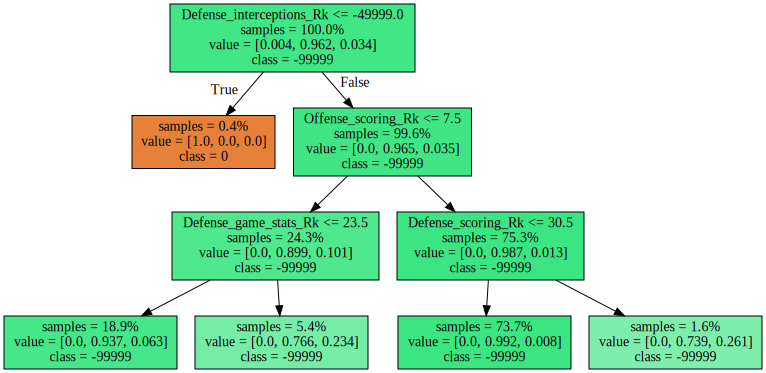

In [103]:
# Visualize decision tree 1
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)

In [0]:
train_location = X_train[['Defense_interceptions_Rk', 'Offense_rushing_Rk']].copy()
val_location = X_val[['Defense_interceptions_Rk', 'Offense_rushing_Rk']].copy()

In [105]:
# With just long & lat, a Logistic Regression can't beat the majority classifier baseline

lr = make_pipeline(
    SimpleImputer(),
    LogisticRegression(solver='lbfgs', multi_class='auto', n_jobs=-1)
)

lr.fit(train_location, y_train)
print('Logistic Regression:')
print('Train Accuracy', lr.score(train_location, y_train))
print('Validation Accuracy', lr.score(val_location, y_val))

Logistic Regression:
Train Accuracy 0.9655657062543921
Validation Accuracy 0.96875


In [0]:
%matplotlib inline
import itertools
from math import floor
import matplotlib.pyplot as plt
import seaborn as sns

def pred_heatmap(model, X, features, class_index=-1, title='', num=100):
    """
    Visualize predicted probabilities, for classifier fit on 2 numeric features
    
    Parameters
    ----------
    model : scikit-learn classifier, already fit
    X : pandas dataframe, which was used to fit model
    features : list of strings, column names of the 2 numeric features
    class_index : integer, index of class label
    title : string, title of plot
    num : int, number of grid points for each feature
    """
    feature1, feature2 = features
    min1, max1 = X[feature1].min(), X[feature1].max()
    min2, max2 = X[feature2].min(), X[feature2].max()
    x1 = np.linspace(min1, max1, num)
    x2 = np.linspace(max2, min2, num)
    combos = list(itertools.product(x1, x2))
    y_pred_proba = model.predict_proba(combos)[:, class_index]
    pred_grid = y_pred_proba.reshape(num, num).T
    table = pd.DataFrame(pred_grid, columns=x1, index=x2)
    plot_every_n_ticks = int(floor(num/4))
    sns.heatmap(table, # vmin=0, vmax=1, 
                xticklabels=plot_every_n_ticks, 
                yticklabels=plot_every_n_ticks)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(title)
    plt.show()

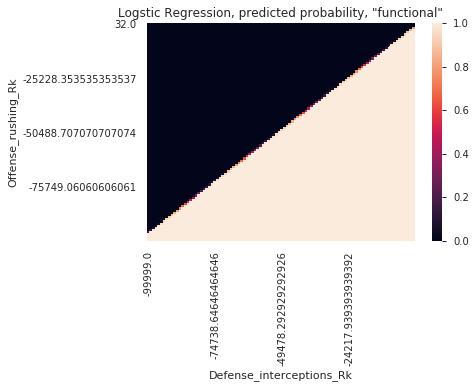

In [107]:
pred_heatmap(lr, train_location, features=['Defense_interceptions_Rk', 'Offense_rushing_Rk'], 
             class_index=0, title='Logstic Regression, predicted probability, "functional"')

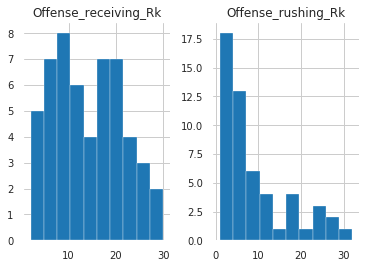

In [111]:
hist = sb_winner.hist(column = ['Offense_rushing_Rk', 'Offense_receiving_Rk'])

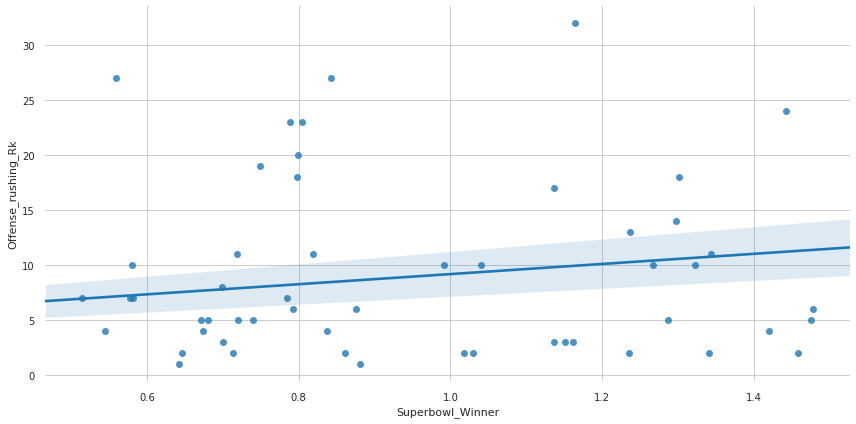

In [82]:
sns.set_style('whitegrid') 
sns.lmplot(x ='Superbowl_Winner', y ='Offense_rushing_Rk', data = sb_winner, height=6, aspect=2, x_jitter=.5)

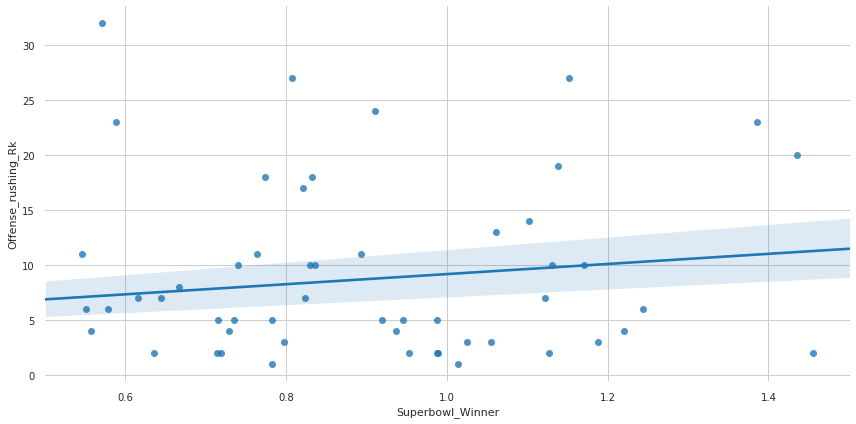

In [83]:
sns.set_style('whitegrid') 
sns.lmplot(x ='Superbowl_Winner', y ='Offense_rushing_Rk', data = sb_winner, height=6, aspect=2, x_jitter=.5)

In [84]:
from sklearn.pipeline import make_pipeline

lr = make_pipeline(
    ce.TargetEncoder(),  
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 -125.43608402960768


In [0]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression
# 2. Instantiate this class
model = LinearRegression()

In [0]:
# 3. Arrange X features matrix & y target vector
features = ['Superbowl_Winner']
target = 'Offense_rushing_Rk'
X_train = df[features]
y_train = df[target]

In [87]:
# 4. Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
# 5. Apply the model to new data
Rushing_Rank = 1
X_test = [[Rushing_Rank]]
y_pred = model.predict(X_test)

y_pred

array([16.16744462])

In [89]:
guess = df['Offense_rushing_Rk'].mean()
guess

-300.6999368288061

In [0]:
errors = guess - df['Offense_rushing_Rk']

In [91]:
mean_absolute_error = errors.abs().mean()
mean_absolute_error

629.8060648336806

In [0]:
feature = 'Superbowl_Winner'

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot